In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

In [2]:
pwd

'/content'

##Loading dataset

In [3]:
dataFrame=pd.read_csv('/content/abalone.csv')

In [5]:
dataFrame.head(10)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


In [6]:
Age=1.5+dataFrame.Rings
dataFrame["Age"]=Age
dataFrame=dataFrame.rename(columns = {'Whole weight':'Whole_weight','Shucked weight': 'Shucked_weight','Viscera weight': 'Viscera_weight',
                            'Shell weight': 'Shell_weight'})
dataFrame=dataFrame.drop(columns=["Rings"],axis=1)
dataFrame.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [7]:
dataFrame.shape

(4177, 9)

In [8]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Age             4177 non-null   float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


##Pre-Processing

In [9]:
dataFrame.isnull().any()

Sex               False
Length            False
Diameter          False
Height            False
Whole_weight      False
Shucked_weight    False
Viscera_weight    False
Shell_weight      False
Age               False
dtype: bool

In [10]:
dataFrame.head(10)

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,9.5
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,21.5
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,17.5
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,10.5
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,20.5


##Descriptive Satistics

In [11]:
dataFrame.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


In [13]:
dataFrame.Sex.unique()

array(['M', 'F', 'I'], dtype=object)

In [14]:
dataFrame.Sex.value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

##Visualization

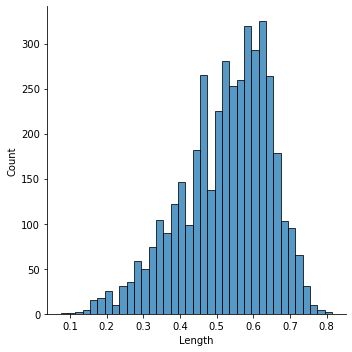

In [15]:
sns.displot(dataFrame.Length)

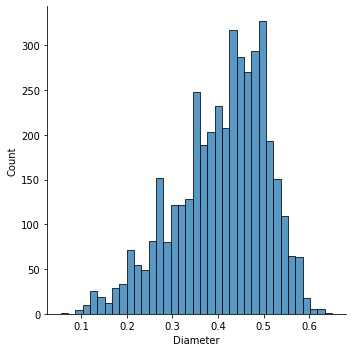

In [16]:
sns.displot(dataFrame.Diameter)

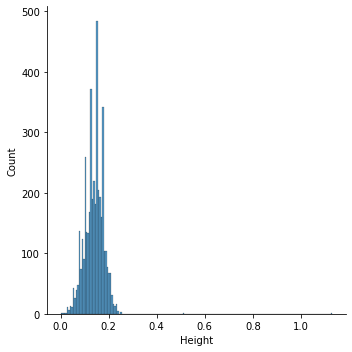

In [18]:
sns.displot(dataFrame.Height)

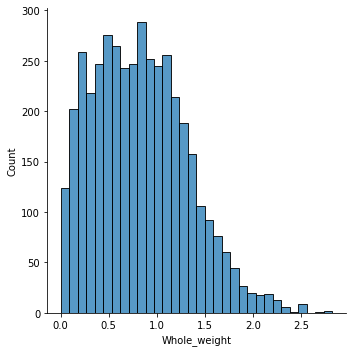

In [19]:
sns.displot(dataFrame.Whole_weight)

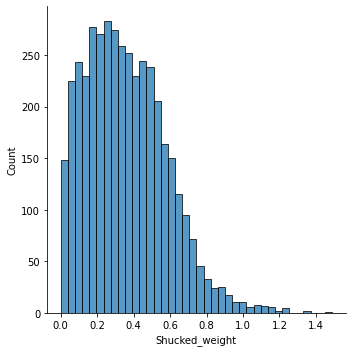

In [21]:
sns.displot(dataFrame.Shucked_weight)

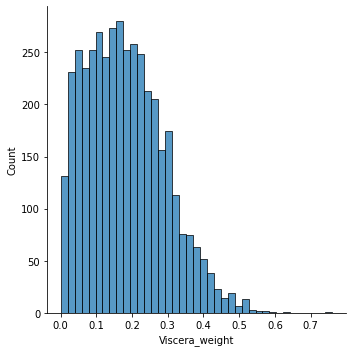

In [22]:
sns.displot(dataFrame.Viscera_weight)

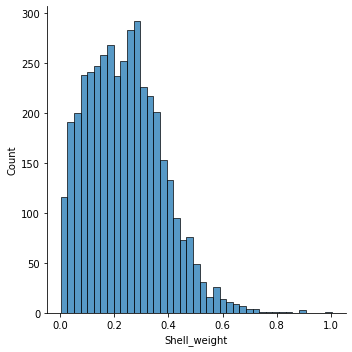

In [23]:
sns.displot(dataFrame.Shell_weight)

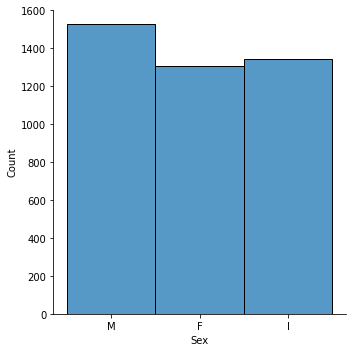

In [25]:
sns.displot(dataFrame.Sex)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


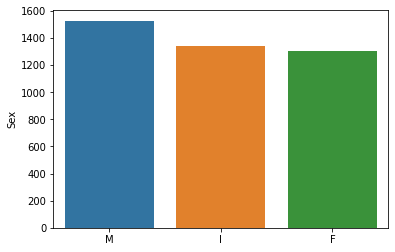

In [26]:
sns.barplot(dataFrame.Sex.value_counts().index,dataFrame.Sex.value_counts())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


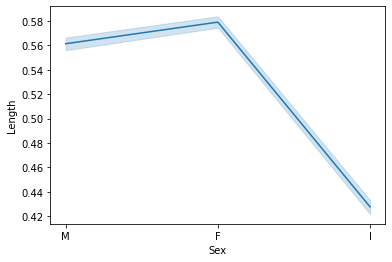

In [27]:
sns.lineplot(dataFrame.Sex,dataFrame.Length)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


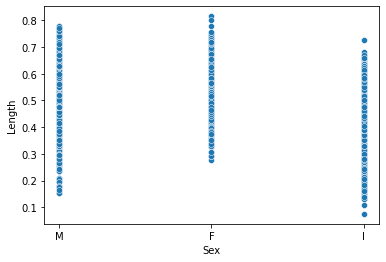

In [28]:
sns.scatterplot(dataFrame.Sex,dataFrame.Length)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


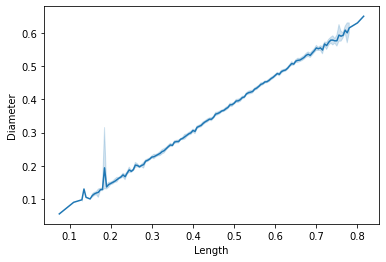

In [29]:
sns.lineplot(dataFrame.Length,dataFrame.Diameter)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


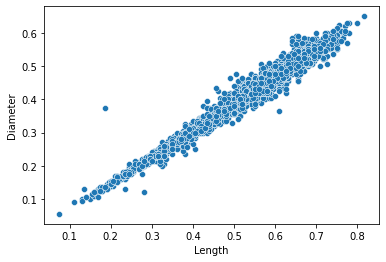

In [30]:
sns.scatterplot(dataFrame.Length,dataFrame.Diameter)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


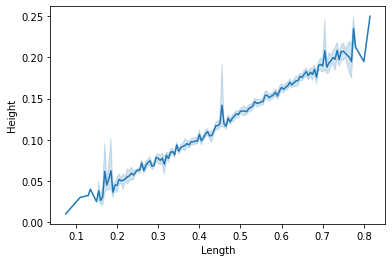

In [31]:
sns.lineplot(dataFrame.Length,dataFrame.Height)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


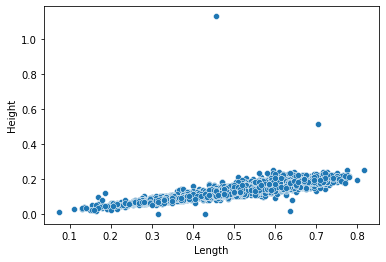

In [32]:
sns.scatterplot(dataFrame.Length,dataFrame.Height)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


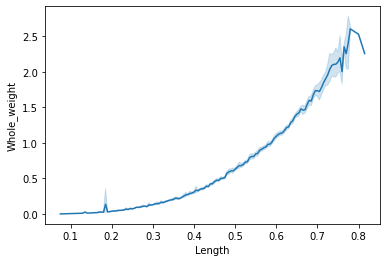

In [34]:
sns.lineplot(dataFrame.Length,dataFrame.Whole_weight)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


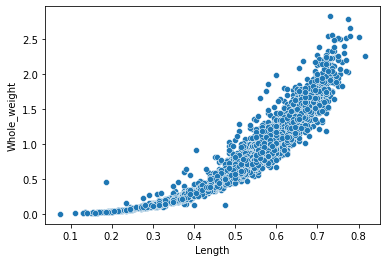

In [35]:
sns.scatterplot(dataFrame.Length,dataFrame.Whole_weight)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


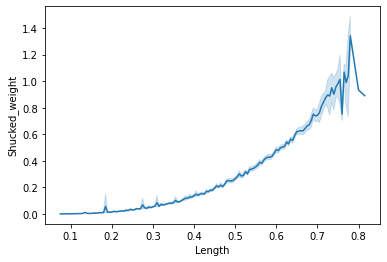

In [36]:
sns.lineplot(dataFrame.Length,dataFrame.Shucked_weight)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


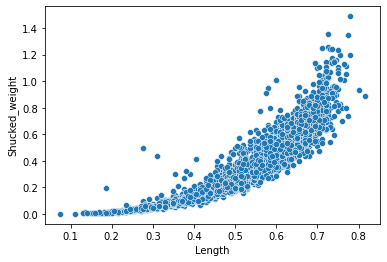

In [37]:
sns.scatterplot(dataFrame.Length,dataFrame.Shucked_weight)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


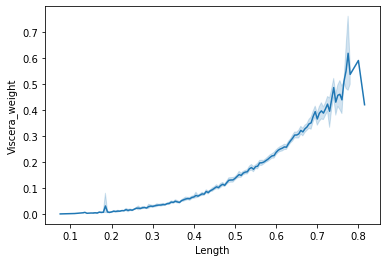

In [38]:
sns.lineplot(dataFrame.Length,dataFrame.Viscera_weight)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


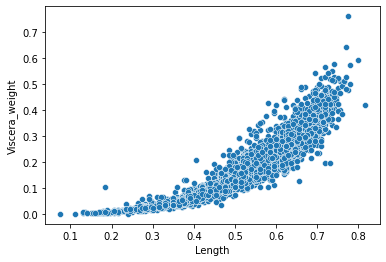

In [39]:
sns.scatterplot(dataFrame.Length,dataFrame.Viscera_weight)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


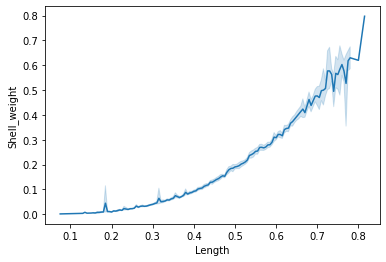

In [40]:
sns.lineplot(dataFrame.Length,dataFrame.Shell_weight)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


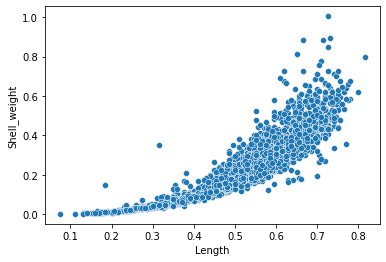

In [41]:
sns.scatterplot(dataFrame.Length,dataFrame.Shell_weight)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


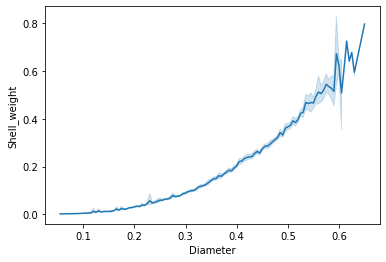

In [42]:
sns.lineplot(dataFrame.Diameter,dataFrame.Shell_weight)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


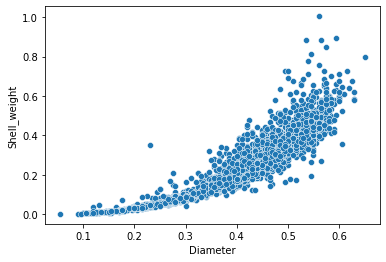

In [43]:
sns.scatterplot(dataFrame.Diameter,dataFrame.Shell_weight)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


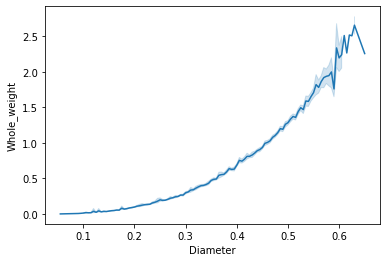

In [44]:
sns.lineplot(dataFrame.Diameter,dataFrame.Whole_weight)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


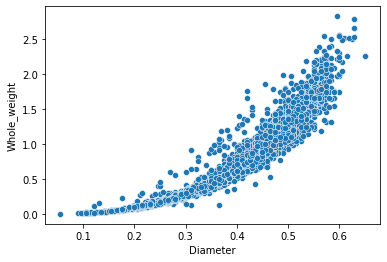

In [45]:
sns.scatterplot(dataFrame.Diameter,dataFrame.Whole_weight)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


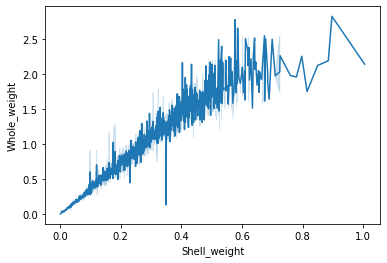

In [46]:
sns.lineplot(dataFrame.Shell_weight,dataFrame.Whole_weight)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


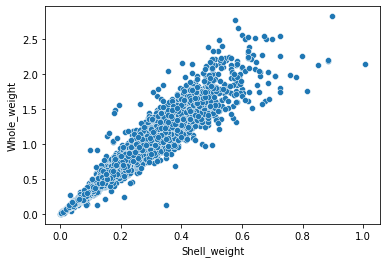

In [48]:
sns.scatterplot(dataFrame.Shell_weight,dataFrame.Whole_weight)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


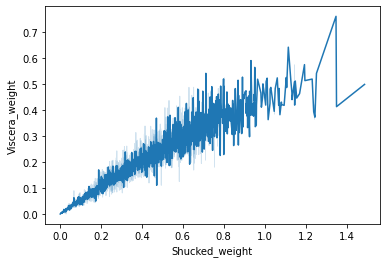

In [49]:
sns.lineplot(dataFrame.Shucked_weight,dataFrame.Viscera_weight)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


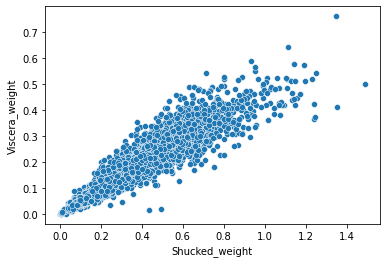

In [50]:
sns.scatterplot(dataFrame.Shucked_weight,dataFrame.Viscera_weight)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0b61ec09d0>,
      dtype=object)

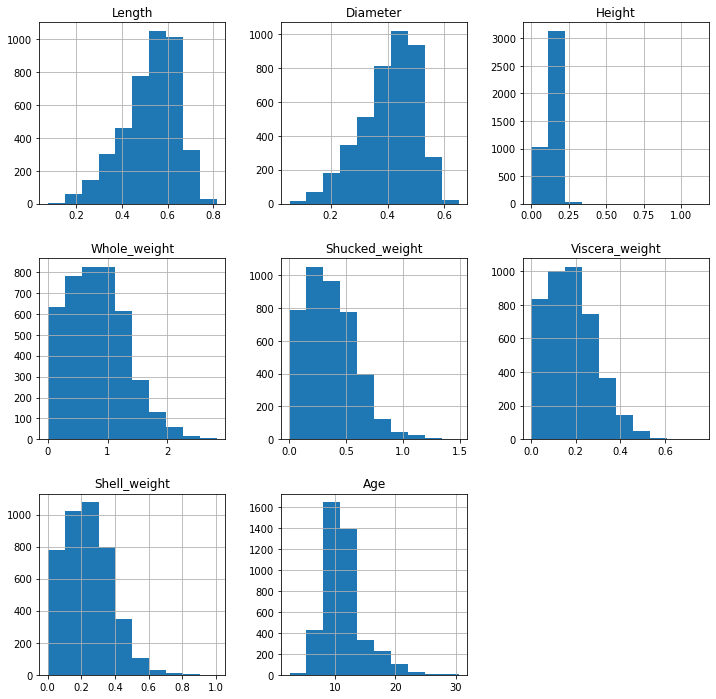

In [52]:
dataFrame.hist(figsize=(12,12))

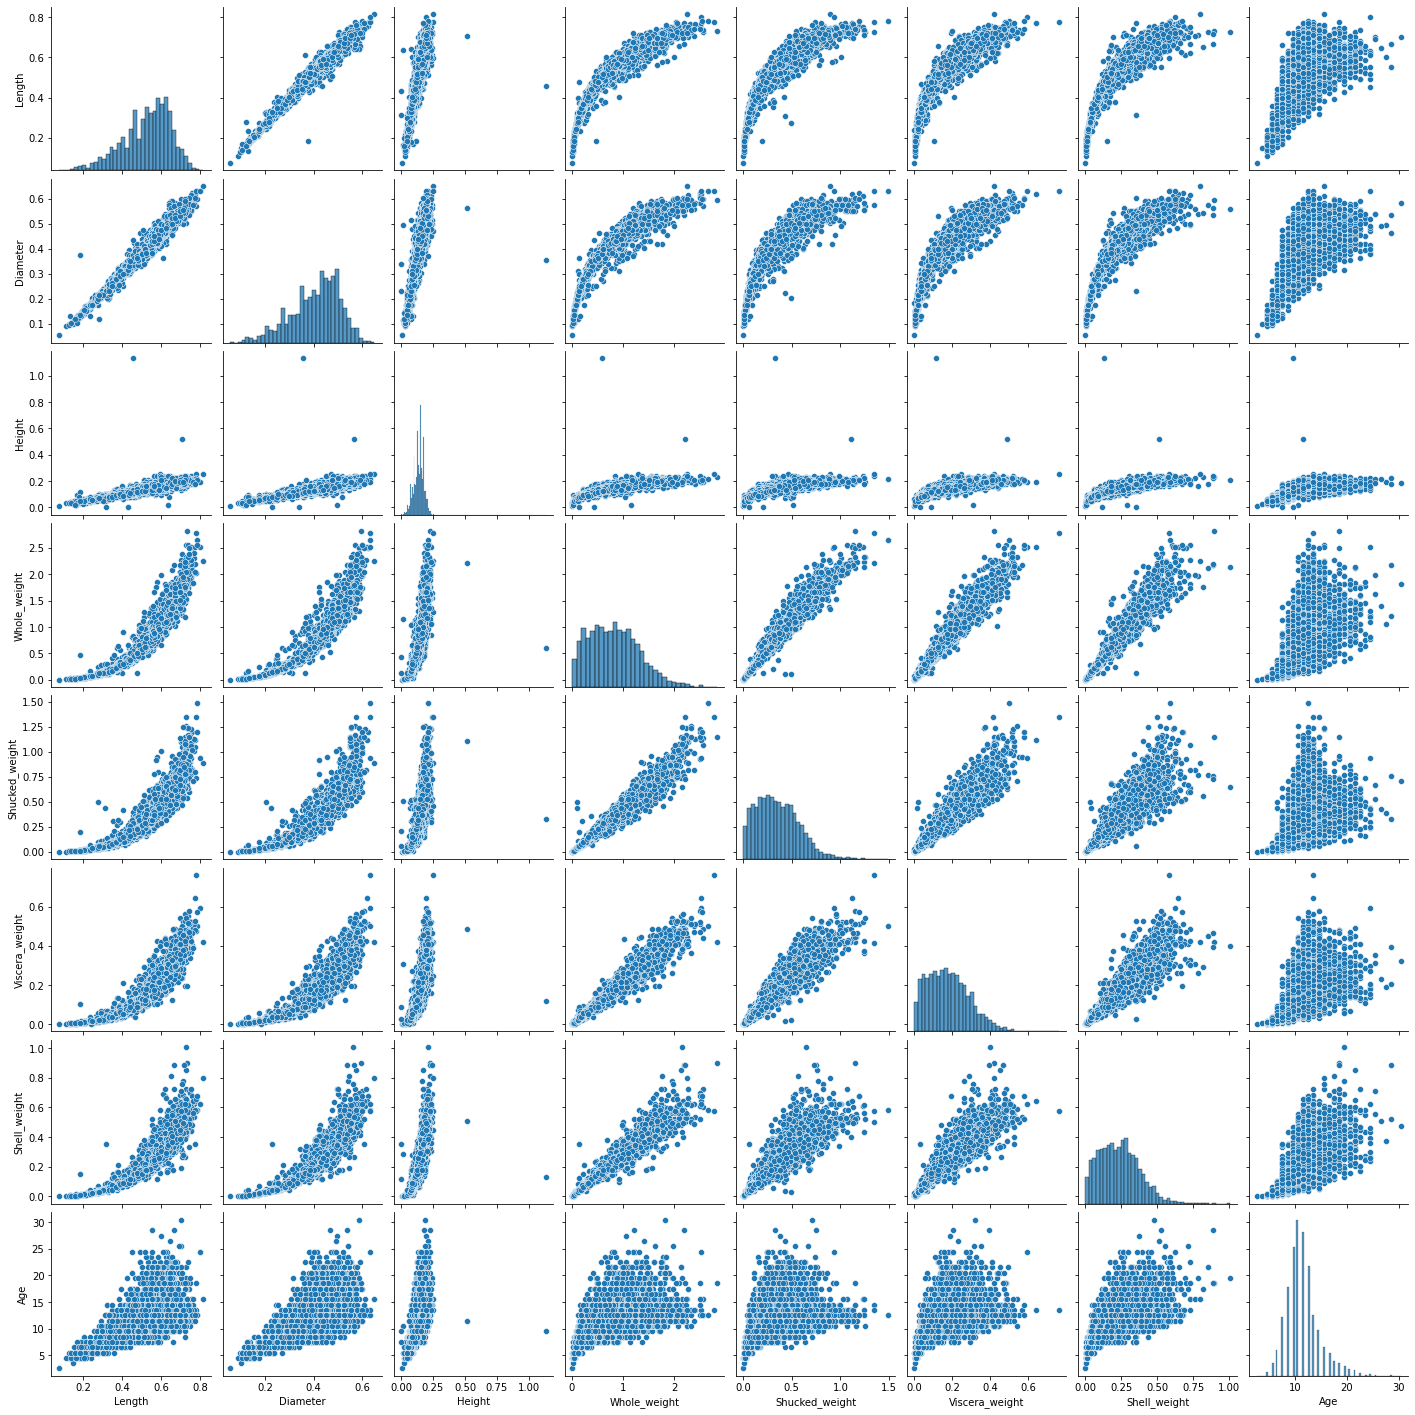

In [53]:
sns.pairplot(dataFrame)

##Handling Outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


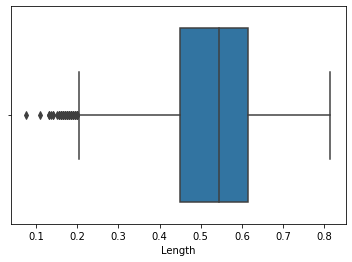

In [54]:
sns.boxplot(dataFrame.Length)

In [55]:
q1=dataFrame.Length.quantile(0.25) 
q3=dataFrame.Length.quantile(0.75)  

In [56]:
IQR=q3-q1

In [57]:
upper_limit= q3 + 1.5*IQR
lower_limit= q1 - 1.5*IQR

In [58]:
upper_limit

0.8624999999999999

In [59]:
lower_limit

0.20250000000000004

In [60]:
dataFrame.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Length             0.5450
Diameter           0.4250
Height             0.1400
Whole_weight       0.7995
Shucked_weight     0.3360
Viscera_weight     0.1710
Shell_weight       0.2340
Age               10.5000
dtype: float64

In [140]:
dataFrame['Length']= np.where(dataFrame['Length']<lower_limit,0.5450,dataFrame['Length'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


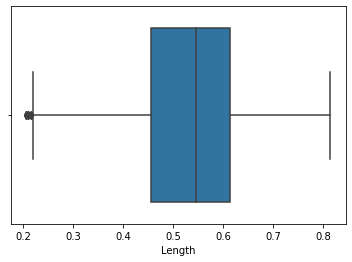

In [141]:
sns.boxplot(dataFrame.Length)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


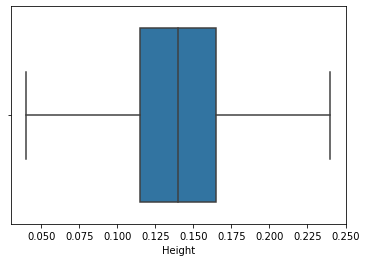

In [142]:
sns.boxplot(dataFrame.Height)

In [143]:
q1=dataFrame.Height.quantile(0.25)  
q3=dataFrame.Height.quantile(0.75)  

In [144]:
IQR=q3-q1

In [145]:
upper_limit= q3 + 1.5*IQR
lower_limit= q1 - 1.5*IQR

In [146]:
upper_limit

0.24000000000000002

In [147]:
lower_limit

0.039999999999999994

In [148]:
dataFrame.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Length             0.545
Diameter           0.425
Height             0.140
Whole_weight       0.799
Shucked_weight     0.336
Viscera_weight     0.171
Shell_weight       0.234
Age               10.500
 Shell_weight      0.234
dtype: float64

In [149]:
dataFrame['Height']= np.where(dataFrame['Height']<lower_limit,0.1400,dataFrame['Height'])

In [150]:
dataFrame['Height']= np.where(dataFrame['Height']>upper_limit,0.1400,dataFrame['Height'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


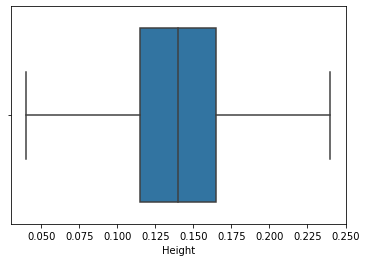

In [151]:
sns.boxplot(dataFrame.Height)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


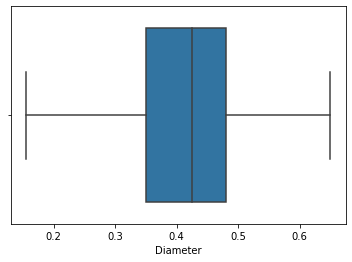

In [152]:
sns.boxplot(dataFrame.Diameter)

In [153]:
q1=dataFrame.Diameter.quantile(0.25) 
q3=dataFrame.Diameter.quantile(0.75)  

In [154]:
IQR=q3-q1

In [155]:
upper_limit= q3 + 1.5*IQR
lower_limit= q1 - 1.5*IQR

In [156]:
upper_limit

0.675

In [157]:
lower_limit

0.15499999999999997

In [158]:
dataFrame.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Length             0.545
Diameter           0.425
Height             0.140
Whole_weight       0.799
Shucked_weight     0.336
Viscera_weight     0.171
Shell_weight       0.234
Age               10.500
 Shell_weight      0.234
dtype: float64

In [159]:
dataFrame['Diameter']= np.where(dataFrame['Diameter']<lower_limit, 0.4250,dataFrame['Diameter'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


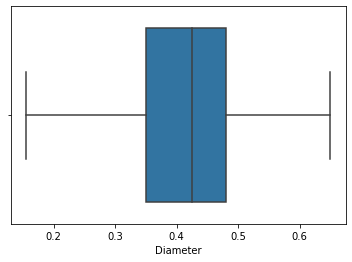

In [160]:
sns.boxplot(dataFrame.Diameter)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


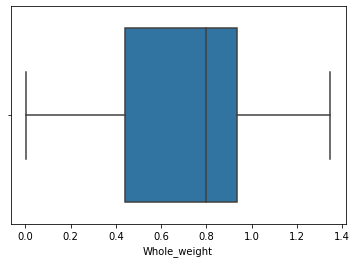

In [161]:
sns.boxplot(dataFrame.Whole_weight)

In [162]:
q1=dataFrame.Whole_weight.quantile(0.25)  
q3=dataFrame.Whole_weight.quantile(0.75)  

In [164]:
IQR=q3-q1

In [165]:
upper_limit= q3 + 1.5*IQR
lower_limit= q1 - 1.5*IQR

In [166]:
upper_limit

1.6789999999999998

In [167]:
lower_limit

-0.30099999999999993

In [168]:
dataFrame.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Length             0.545
Diameter           0.425
Height             0.140
Whole_weight       0.799
Shucked_weight     0.336
Viscera_weight     0.171
Shell_weight       0.234
Age               10.500
 Shell_weight      0.234
dtype: float64

In [169]:
dataFrame['Whole_weight']= np.where(dataFrame['Whole_weight']>upper_limit,0.7995,dataFrame['Whole_weight'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


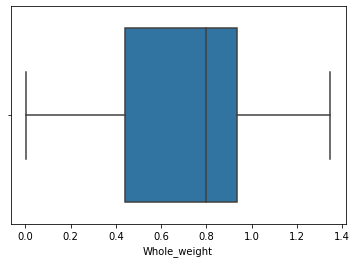

In [170]:
sns.boxplot(dataFrame.Whole_weight)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


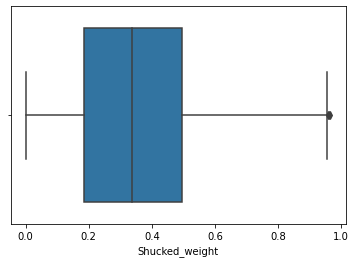

In [171]:
sns.boxplot(dataFrame.Shucked_weight)

In [172]:
q1=dataFrame.Shucked_weight.quantile(0.25)  
q3=dataFrame.Shucked_weight.quantile(0.75)  

In [173]:
IQR=q3-q1

In [174]:
upper_limit= q3 + 1.5*IQR
lower_limit= q1 - 1.5*IQR

In [175]:
upper_limit

0.9572499999999999

In [176]:
lower_limit

-0.27675

In [177]:
dataFrame.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Length             0.545
Diameter           0.425
Height             0.140
Whole_weight       0.799
Shucked_weight     0.336
Viscera_weight     0.171
Shell_weight       0.234
Age               10.500
 Shell_weight      0.234
dtype: float64

In [178]:
dataFrame['Shucked_weight']= np.where(dataFrame['Shucked_weight']>upper_limit,0.3360,dataFrame['Shucked_weight'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


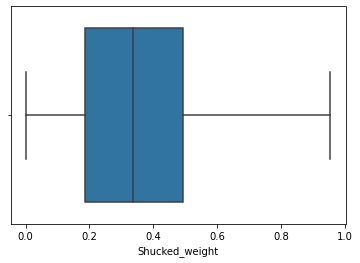

In [179]:
sns.boxplot(dataFrame.Shucked_weight)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


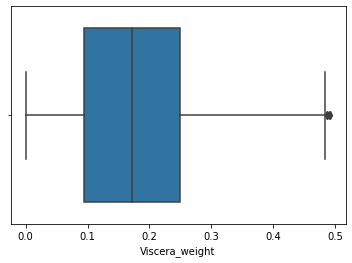

In [180]:
sns.boxplot(dataFrame.Viscera_weight)

In [181]:
q1=dataFrame.Viscera_weight.quantile(0.25)  
q3=dataFrame.Viscera_weight.quantile(0.75)  

In [182]:
IQR=q3-q1

In [183]:
upper_limit= q3 + 1.5*IQR
lower_limit= q1 - 1.5*IQR

In [184]:
upper_limit

0.4835

In [185]:
lower_limit

-0.14049999999999999

In [186]:
dataFrame.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Length             0.545
Diameter           0.425
Height             0.140
Whole_weight       0.799
Shucked_weight     0.336
Viscera_weight     0.171
Shell_weight       0.234
Age               10.500
 Shell_weight      0.234
dtype: float64

In [187]:
dataFrame['Viscera_weight']= np.where(dataFrame['Viscera_weight']>upper_limit,0.1710,dataFrame['Viscera_weight'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


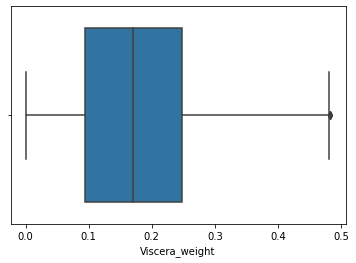

In [188]:
sns.boxplot(dataFrame.Viscera_weight)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


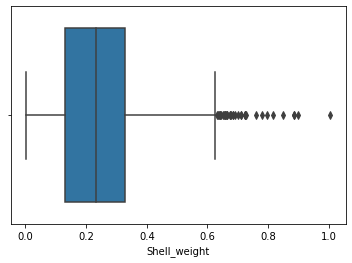

In [189]:
sns.boxplot(dataFrame.Shell_weight)

In [190]:
q1=dataFrame.Shell_weight.quantile(0.25)  
q3=dataFrame.Shell_weight.quantile(0.75)  

In [191]:
IQR=q3-q1

In [192]:

upper_limit= q3 + 1.5*IQR
lower_limit= q1 - 1.5*IQR

In [193]:
upper_limit

0.6275

In [194]:
lower_limit

-0.16849999999999998

In [195]:
dataFrame.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Length             0.545
Diameter           0.425
Height             0.140
Whole_weight       0.799
Shucked_weight     0.336
Viscera_weight     0.171
Shell_weight       0.234
Age               10.500
 Shell_weight      0.234
dtype: float64

In [196]:
dataFrame[' Shell_weight']= np.where(dataFrame['Shell_weight']>upper_limit,0.2340,dataFrame['Shell_weight'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


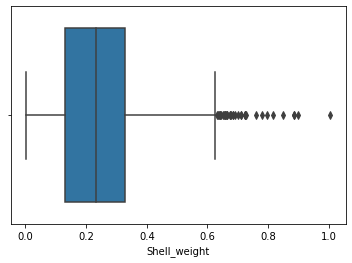

In [197]:
sns.boxplot(dataFrame.Shell_weight)

##Label encoder

In [198]:
from sklearn.preprocessing import LabelEncoder

In [199]:
l=LabelEncoder()

In [200]:
dataFrame.Sex=l.fit_transform(dataFrame.Sex)

In [201]:
dataFrame.head(10)

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age,Shell_weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5,0.055
5,1,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,9.5,0.120
6,0,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,21.5,0.330
7,0,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,17.5,0.260
8,2,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,10.5,0.165
9,0,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,20.5,0.320


In [202]:
dataFrame.corr()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age,Shell_weight
Sex,1.000000,-0.032999,-0.036394,-0.041769,-0.017682,-0.019564,-0.036367,-0.034854,-0.034627,-0.039365
Length,-0.032999,1.000000,0.974921,0.871137,0.818443,0.877951,0.882250,0.884600,0.516360,0.885617
Diameter,-0.036394,0.974921,1.000000,0.876931,0.821092,0.874981,0.880741,0.894301,0.534936,0.894735
Height,-0.041769,0.871137,0.876931,1.000000,0.778188,0.822479,0.856481,0.885897,0.597133,0.882253
Whole_weight,-0.017682,0.818443,0.821092,0.778188,1.000000,0.780522,0.772668,0.744827,0.509459,0.778494
Shucked_weight,-0.019564,0.877951,0.874981,0.822479,0.780522,1.000000,0.901458,0.850769,0.430498,0.855615
Viscera_weight,-0.036367,0.882250,0.880741,0.856481,0.772668,0.901458,1.000000,0.888355,0.506881,0.885600
Shell_weight,-0.034854,0.884600,0.894301,0.885897,0.744827,0.850769,0.888355,1.000000,0.627574,0.945989
Age,-0.034627,0.516360,0.534936,0.597133,0.509459,0.430498,0.506881,0.627574,1.000000,0.606431
Shell_weight,-0.039365,0.885617,0.894735,0.882253,0.778494,0.855615,0.885600,0.945989,0.606431,1.000000


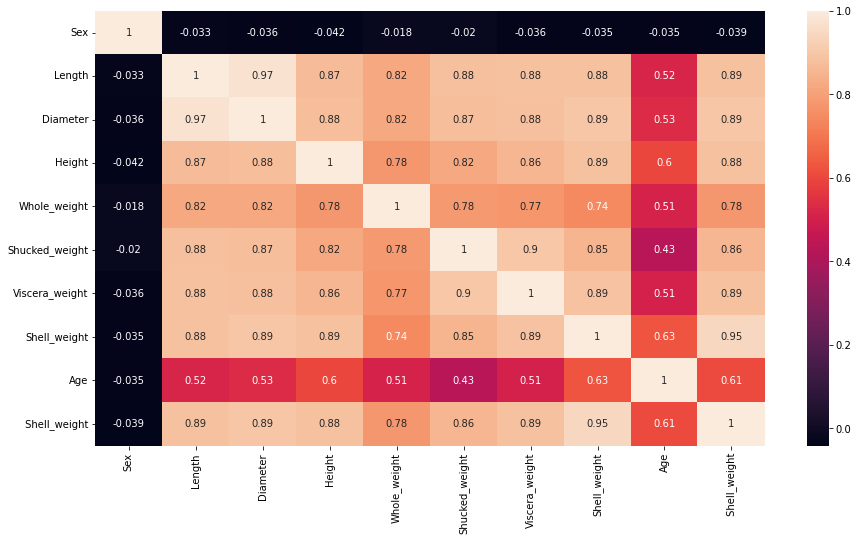

In [203]:
plt.figure(figsize=(15,8))
sns.heatmap(dataFrame.corr(),annot=True)

In [204]:
dataFrame.corr().Age.sort_values(ascending=False)

Age               1.000000
Shell_weight      0.627574
 Shell_weight     0.606431
Height            0.597133
Diameter          0.534936
Length            0.516360
Whole_weight      0.509459
Viscera_weight    0.506881
Shucked_weight    0.430498
Sex              -0.034627
Name: Age, dtype: float64

In [205]:
dataFrame.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age,Shell_weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5,0.055


##X and Y Split

In [206]:
y=dataFrame['Age']
y

0       16.5
1        8.5
2       10.5
3       11.5
4        8.5
        ... 
4172    12.5
4173    11.5
4174    10.5
4175    11.5
4176    13.5
Name: Age, Length: 4177, dtype: float64

In [207]:
X=dataFrame.drop(columns=['Age'],axis=1)
X.head(10)

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Shell_weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0.055
5,1,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,0.120
6,0,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,0.330
7,0,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,0.260
8,2,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,0.165
9,0,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,0.320


##Scaling

In [208]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()

In [209]:
X_scaled=pd.DataFrame(scale.fit_transform(X),columns=X.columns)
X_scaled.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Shell_weight
0,1.0,0.409836,0.424242,0.275,0.380386,0.234523,0.208290,0.147982,0.238172
1,1.0,0.237705,0.222222,0.250,0.166048,0.103358,0.099482,0.068261,0.109864
2,0.0,0.532787,0.535354,0.475,0.501486,0.268101,0.292228,0.207773,0.334403
3,1.0,0.385246,0.424242,0.425,0.381872,0.225079,0.235233,0.152965,0.246191
4,0.5,0.204918,0.202020,0.200,0.150817,0.092865,0.080829,0.053313,0.085806


##Training and Testing Split

In [210]:
dataFrame.shape

(4177, 10)

In [211]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X_scaled,y,test_size=0.2,random_state=0)

In [212]:
x_train.shape

(3341, 9)

In [213]:
x_test.shape

(836, 9)

In [214]:
y_train.shape

(3341,)

In [215]:
y_test.shape

(836,)

##Model Building

##Linear regression

In [216]:
from sklearn.linear_model import LinearRegression
l=LinearRegression()

In [217]:
l.fit(x_train,y_train)

LinearRegression()

In [218]:
pred_test= l.predict(x_test)
pred_test

array([14.46807939, 10.85328571, 12.41850713,  8.22507828, 11.77541044,
       13.45128378,  9.10923927, 10.69961983, 10.02001105, 13.6204021 ,
        9.75436078,  8.43575275,  9.52661537, 10.30930058,  8.57473211,
       11.7730504 ,  9.25550319, 15.24611553, 13.65972467,  9.23342021,
        8.99122956,  8.39382375, 10.29974085,  9.10245603, 11.75788311,
       12.55538432,  7.63527014, 13.75386699, 11.51435864, 12.66259044,
        9.18246949,  7.58971522, 13.02089728, 15.09713258,  8.83617351,
        9.99830057, 10.28599449, 11.91211382,  9.99395445, 13.83365939,
       12.83928391, 10.55058073, 12.8306643 , 12.88688466, 13.86555298,
       10.42391636, 10.78707391, 13.97957106, 13.79991101,  9.35894189,
       13.02475388,  8.90191736, 10.03465771, 15.72407828, 10.66643443,
        9.11646158,  8.34771669,  8.91562137,  8.86197138,  8.72716823,
       11.33679039, 10.51570806, 11.61849322,  9.39835113,  9.3863723 ,
       13.6476246 , 13.26804798, 14.69086417, 10.61115151, 15.11

In [219]:
y_test

668     14.5
1580     9.5
3784    12.5
463      6.5
2615    13.5
        ... 
575     12.5
3231    13.5
1084     8.5
290     18.5
2713     5.5
Name: Age, Length: 836, dtype: float64

In [220]:
pred_train = l.predict(x_train)
pred_train

array([ 6.72340985,  8.94672346, 14.14552831, ..., 11.13604817,
       12.98289045,  9.64318874])

In [221]:
Rings=pd.DataFrame({'Actual_y_value':y_test,'Predicted_y_value':pred_test})
Rings.head(10)

,Actual_y_value,Predicted_y_value
668,14.5,14.468079
1580,9.5,10.853286
3784,12.5,12.418507
463,6.5,8.225078
2615,13.5,11.775410
1399,12.5,13.451284
2054,8.5,9.109239
2058,9.5,10.699620
217,8.5,10.020011
1931,10.5,13.620402


In [222]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, pred_test), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, pred_test), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred_test), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred_test), 2)) 
print("R2 score =", round(sm.r2_score(y_test, pred_test), 2))

Mean absolute error = 1.66
Mean squared error = 5.44
Median absolute error = 1.22
Explain variance score = 0.5
R2 score = 0.5
